In [6]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image

In [7]:
data = np.genfromtxt('data.csv', delimiter=',')

In [8]:
x = []
y = []

for i in range(0, len(data)):
    x.append(data[i][0])
    y.append(data[i][1])

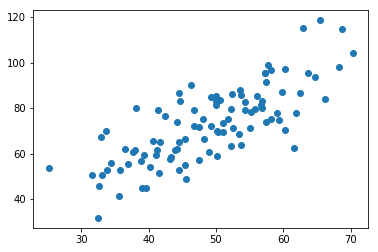

In [9]:
plt.scatter(x, y)

In [10]:
initial_m = 0
initial_b = 0

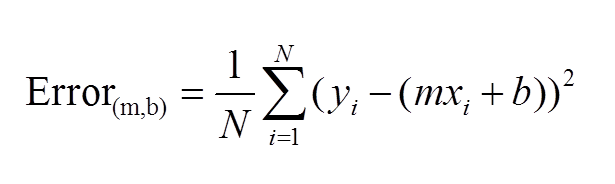

In [11]:
Image(filename='linear_regression_error.png')

In [58]:
def compute_error(m, b, x, y):
    totalError = 0
    
    for i in range(0, len(x)):
        totalError += ((y[i] - (m * x[i] + b)) **2)
    
    totalError = totalError / float(len(x))
    return totalError

In [59]:
print('initial mean squared error: ', compute_error(initial_m, initial_b, x, y))

initial mean squared error:  5565.10783448


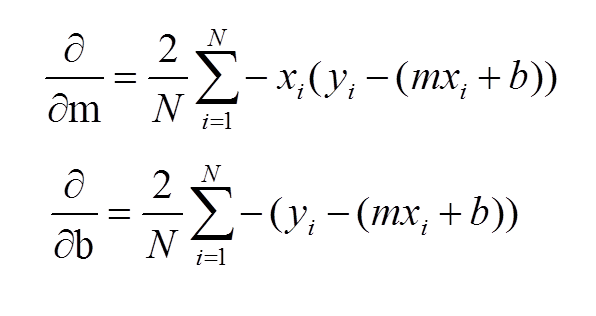

In [65]:
Image(filename='linear_regression_gradient.png')

In [66]:
def linear_formula(x, m, b):
    return (m * x) + b

def gradient_step(x, y, current_m, current_b, learning_rate):
    gradient_m = 0
    gradient_b = 0
    N = float(len(x))
    
    for i in range(0, len(x)):
        gradient_m += (-2/N) * x[i] * (y[i] - linear_formula(x[i], current_m, current_b))
        gradient_b += (-2/N) * (y[i] - linear_formula(x[i], current_m, current_b))
    
    new_m = current_m - (learning_rate * gradient_m)
    new_b = current_b - (learning_rate * gradient_b)
    
    return [new_m, new_b]

In [96]:
def gradient_descent(x, y, current_m, current_b, learning_rate, epochs):
    m = current_m
    b = current_b
    
    check_iter = 100
    
    for i in range(epochs):
        m, b = gradient_step(x, y, m, b, learning_rate)
        
        if i % check_iter == 0:
            print("epoch[", i, "] - loss: ", compute_error(m, b, x, y))
        
    return [m, b]

In [97]:
learning_rate = 0.0001
epochs = 1000

In [98]:
m, b = gradient_descent(x, y, initial_m, initial_b, learning_rate, epochs)
print("m: ", m, "b: ", b)

epoch[ 0 ] - loss:  1484.58655741
epoch[ 100 ] - loss:  112.64702057
epoch[ 200 ] - loss:  112.643416004
epoch[ 300 ] - loss:  112.639816876
epoch[ 400 ] - loss:  112.636223176
epoch[ 500 ] - loss:  112.632634897
epoch[ 600 ] - loss:  112.629052031
epoch[ 700 ] - loss:  112.62547457
epoch[ 800 ] - loss:  112.621902504
epoch[ 900 ] - loss:  112.618335827
m:  1.47774408519 b:  0.0889365199374


In [85]:
pred_y = []

for i in range(0, len(x)):
    pred_y.append(linear_formula(x[i], m, b))

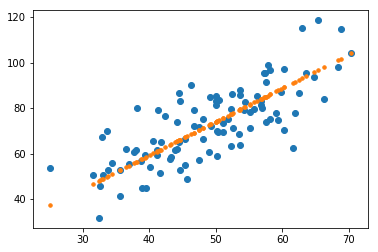

In [95]:
plt.scatter(x, y)
plt.scatter(x, pred_y, s=12)